In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
# read training data
bank_train = pd.read_csv("training-training-bank_train/bank_train.csv")

In [3]:
# create x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

In [14]:
#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

# specify number of folds for k-fold CV
n_folds = 10

# specify range of the hyperparameter max_depth 
parameters = parameters = {'n_estimators': range(10, 150, 40)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

In [15]:

# fit the rf model 
rf.fit(x_train, y_train)

# store scores/results of GridSearch CV in a df
scores = rf.cv_results_


E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\s

E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\SoftwareInstallations\Anaconda3\envs\Masters37\lib\s

In [16]:
df = pd.DataFrame(scores)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.102665,0.014134,0.009545,0.005877,10,{'n_estimators': 10},0.887879,0.906061,0.890909,0.896970,0.921212,0.896657,0.914894,0.905775,0.917933,0.914894,0.905318,0.011191,4,0.991906,0.991906,0.99629,0.989545,0.992917,0.993257,0.994606,0.991908,0.995954,0.993931,0.993222,0.001952
1,0.525315,0.049009,0.021573,0.006793,50,{'n_estimators': 50},0.900000,0.906061,0.896970,0.912121,0.915152,0.902736,0.936170,0.905775,0.924012,0.899696,0.909869,0.011723,2,1.000000,0.999663,1.00000,0.999325,0.999663,1.000000,0.999663,1.000000,1.000000,1.000000,0.999831,0.000226
2,0.857279,0.067058,0.034040,0.004398,90,{'n_estimators': 90},0.906061,0.900000,0.903030,0.893939,0.912121,0.899696,0.933131,0.911854,0.927052,0.908815,0.909570,0.011668,3,0.999663,1.000000,1.00000,1.000000,0.999663,1.000000,1.000000,1.000000,1.000000,1.000000,0.999933,0.000135
3,1.350846,0.166128,0.059946,0.016530,130,{'n_estimators': 130},0.906061,0.906061,0.906061,0.903030,0.915152,0.896657,0.939210,0.902736,0.924012,0.902736,0.910171,0.012060,1,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


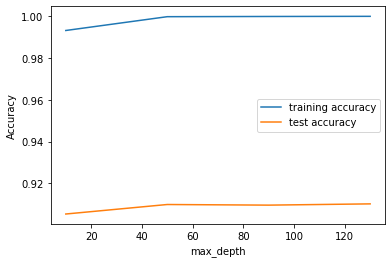

In [17]:
#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"] , 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"] , 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# plt.savefig('/code/output/max_depth.png') 

In [ ]:



# read test data
bank_test = pd.read_csv("/data/test/bank_test.csv")

# print(bank_train.head())
# print(bank_test.head())

##########################
## WRITE YOUR CODE HERE ##
##########################









# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
max_depth_optimal = 4

#########################################
# Build the model with optimal max_depth
#########################################
rf = RandomForestClassifier(max_depth = max_depth_optimal)
rf.fit(x_train, y_train)

## Make predictions
predictions = rf.predict(bank_test.drop(['id'], axis=1))
# print(predictions[:5])

# Write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

# Write the output
d.to_csv('/code/output/bank_predictions.csv', sep=",")

In [20]:
import ast,sys
# input_str = [,24]
# input_list = ast.literal_eval(input_str)
intervals = [[29,31],[23,26],[24,25]]
date = 24

count = 0
for i in intervals:
    for j in range(int(intervals[0]), int(intervals[1]+1)):
        if (date >= intervals[0] and date <= intervals[1]):
            count = count + 1
print(count)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [ ]:
count = 0
data = [] 
# storing the x and y 
# coordinates in data vector 

for i in range(len(v)): 
    data.append([v[i][0], 'x'])
    data.append([v[i][1], 'y'])
    
    if( x <= date and y >= date):
        count += 1 

# pushing the x coordinate 
 

  

        # pushing the y coordinate 

        
        
        